# Test d'entrainement d'un model pour classifier des image d'anime de 2023 

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib 
import os
import tensorflow as tf
import keras_tuner as kt 

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Chargement des images

In [22]:
data_dir = pathlib.Path('data/anime_images')
print(data_dir)
print(os.path.abspath(data_dir))

data/anime_images
/home/ssea2/Desktop/IA/vision_recoperso/Projet-IA/data/anime_images


In [23]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

83060


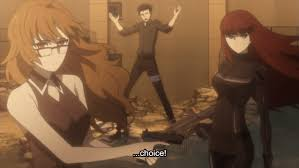

In [24]:
anime_images = list(data_dir.glob('*/*'))
PIL.Image.open(str(anime_images[9]))

# Load data using a Keras utility

In [25]:
batch_size = 32
img_height = 256
img_width = 256

In [26]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=0,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 83066 files belonging to 232 classes.
Using 66453 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=0,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 83066 files belonging to 232 classes.
Using 16613 files for validation.


In [28]:
class_names = train_ds.class_names
print(len(class_names),class_names)

232 ['A Lull in the Sea', 'A Place Further Than The Universe', 'A Silent Voice', 'AKIRA', 'Ace of Diamond', 'Akatsuki no Yona', 'Angel Beats!', 'Aria The Natural', 'Aria The Origination', 'Assassination Classroom', 'Attack on Titan', 'Baccano!', 'Bakemonogatari', 'Bakuman', 'Barakamon', 'Beck Mongolian Chop Squad', 'Berserk', 'Big Windup!', 'Black Butler', 'Black Lagoon', 'Bunny Drop', 'Cardcaptor Sakura', 'Carpcaptor Sakura', 'Castle in the Sky', 'Chihayafuru', 'Clannad', 'Code Geass', 'Cross Game', 'D.Gray-man', 'DARLING in the FRANXX', 'Daily Lives of High School Boys', 'Darker than Black', 'Death Note', 'Death Parade', 'Den-noh Coil', 'Descending Stories Showa Genroku Rakugo Shinju', 'Detective Conan', 'Detroit Metal City The Animated Series', 'Dragon Ball', 'Dragon Ball Z', 'Durarara', 'Durarara!!', 'ERASED', 'Erin', 'Eureka Seven', 'FateZero', 'Fatestay night', 'Fighting Spirit Special', 'From the New World', 'Full Metal Panic', 'Fullmetal Alchemist Brotherhood', 'Gankutsuou The 

# Visualize the data

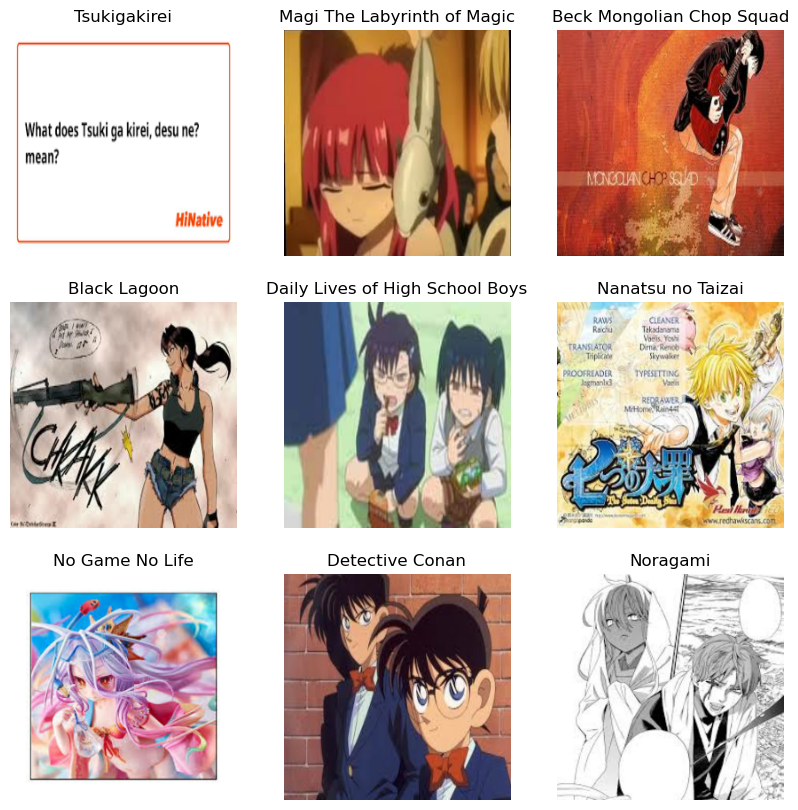

In [29]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


# Configure the dataset for performance

In [31]:
"""AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)"""

'AUTOTUNE = tf.data.AUTOTUNE\n\ntrain_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)\nval_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)'

# Create the model

In [37]:
nb_class = len(class_names)

model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128, (4,4)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(nb_class)
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
#model.summary()

In [39]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)   

Epoch 1/10


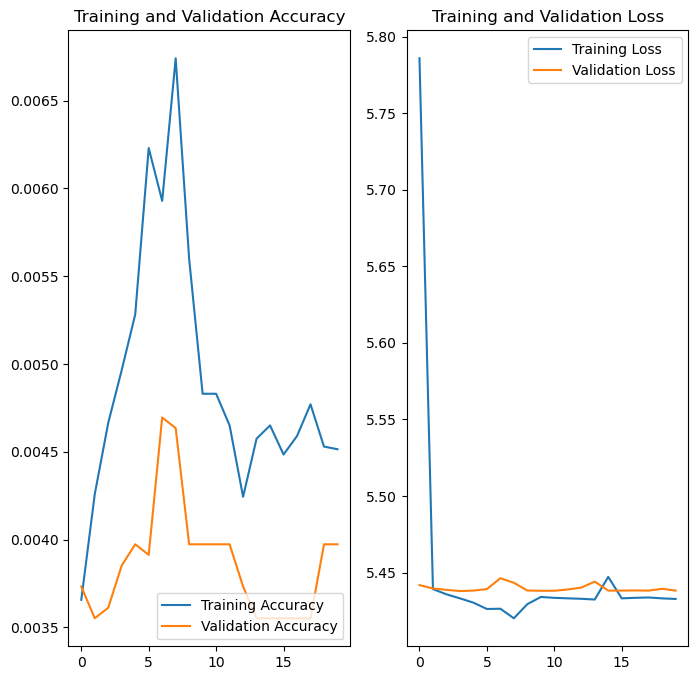

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()